# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = os.path.join(os.getcwd(), "originalData")
df = pd.read_csv(os.path.join(data_path, "new_data.csv"), encoding="latin1" )

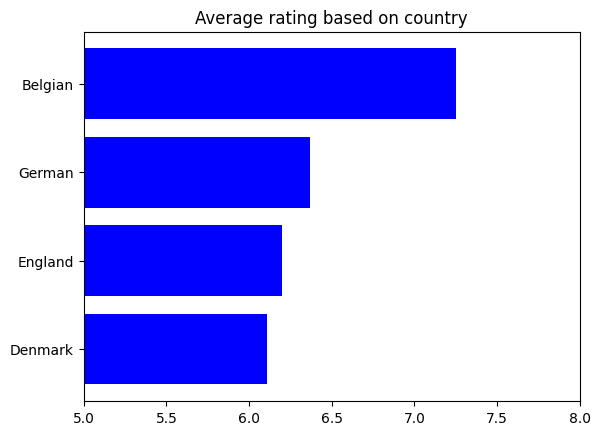

(5, 8)


In [5]:
def avgByCoun():
    keepers = df['Country'].value_counts().reset_index()
    keepers = keepers[keepers['count'] > 3]
    keepers = list(keepers.pop('Country'))

    df_avgByCoun = df.groupby(['Country'])['Rating'].mean().reset_index()
    df_avgByCoun = df_avgByCoun[df_avgByCoun['Country'].isin(keepers)]
    df_avgByCoun = df_avgByCoun.sort_values(by=['Rating'])
    df_avgByCoun['Country'] = df_avgByCoun['Country'].str.capitalize()
    
    default_x_ticks = (round(min(df_avgByCoun['Rating']))) - 1, (round(max(df_avgByCoun['Rating'])) + 1)
    y = list(df_avgByCoun.pop('Country'))
    x = list(df_avgByCoun.pop('Rating'))
    plt.barh(width=x, y=y, color = 'Blue')
    plt.xlim(default_x_ticks)
    plt.title("Average rating based on country")
    plt.show()
    return default_x_ticks

print(avgByCoun())